# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [1]:
N = 15
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Sleep_Hours'

# 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
try:
    df = pd.read_csv('../datasets/teen_phone_addiction_dataset.csv')
    print("CSV-файл успешно загружен локально.")
except FileNotFoundError:
    print("Локальный CSV-файл не найден. Загрузка из сети...")
    url = 'https://raw.githubusercontent.com/datasets/teen-phone-addiction-dataset/main/teen_phone_addiction_dataset.csv'
    df = pd.read_csv(url)
    print("Данные успешно загружены из сети.")

CSV-файл успешно загружен локально.


In [4]:
column_to_analyze = cols[N % 7]
print(f"\nN = {N}, N % 7 = {N % 7}")
print(f"Выбранный столбец для анализа: '{column_to_analyze}'")
data_series = df[column_to_analyze][:100]


N = 15, N % 7 = 1
Выбранный столбец для анализа: 'Sleep_Hours'


In [5]:
mean_val = data_series.mean()
variance_val = data_series.var()
mode_val = data_series.mode()[0]
median_val = data_series.median()
quantiles = data_series.quantile([0.25, 0.5, 0.75])
kurtosis_val = data_series.kurtosis()
skewness_val = data_series.skew()
iqr = quantiles[0.75] - quantiles[0.25]

In [6]:
print("\nСтатистические характеристики:")
print(f"1. Среднее: {mean_val:.4f}")
print(f"2. Дисперсия: {variance_val:.4f}")
print(f"3. Мода: {mode_val:.4f}")
print(f"4. Медиана: {median_val:.4f}")
print("5. Квантили:")
print(f"   - 0.25 (Q1): {quantiles[0.25]:.4f}")
print(f"   - 0.50 (Q2/Медиана): {quantiles[0.5]:.4f}")
print(f"   - 0.75 (Q3): {quantiles[0.75]:.4f}")
print(f"6. Эксцесс: {kurtosis_val:.4f}")
print(f"7. Асимметрия: {skewness_val:.4f}")
print(f"8. Интерквартильный размах (IQR): {iqr:.4f}")


Статистические характеристики:
1. Среднее: 6.5320
2. Дисперсия: 1.8287
3. Мода: 6.6000
4. Медиана: 6.6000
5. Квантили:
   - 0.25 (Q1): 5.6750
   - 0.50 (Q2/Медиана): 6.6000
   - 0.75 (Q3): 7.2250
6. Эксцесс: 0.1586
7. Асимметрия: 0.0849
8. Интерквартильный размах (IQR): 1.5500


# 2

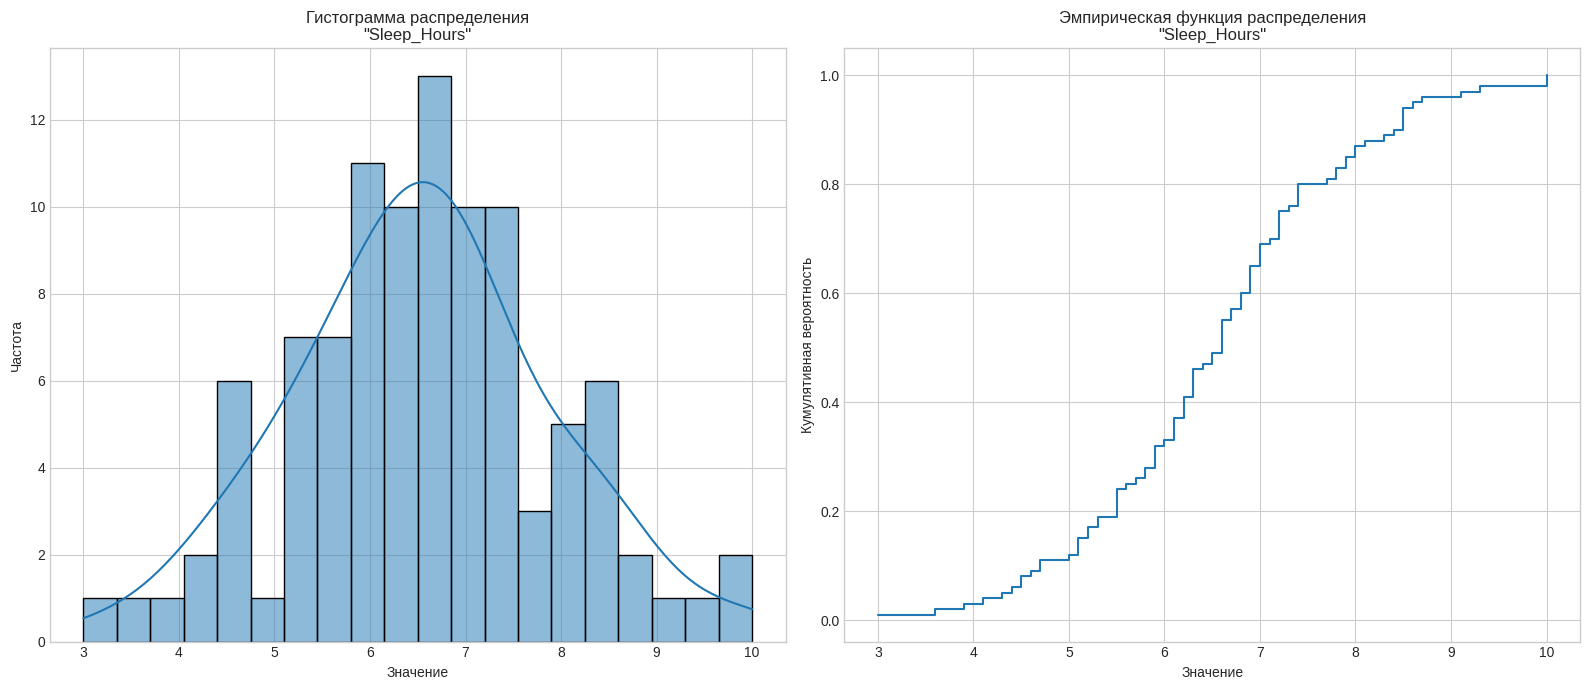

In [7]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Гистограмма
sns.histplot(data_series, kde=True, ax=axes[0], bins=20)
axes[0].set_title(f'Гистограмма распределения\n"{column_to_analyze}"')
axes[0].set_xlabel('Значение')
axes[0].set_ylabel('Частота')

ecdf_x = np.sort(data_series)
ecdf_y = np.arange(1, len(data_series) + 1) / len(data_series)


axes[1].step(ecdf_x, ecdf_y, where='post')
axes[1].set_title(f'Эмпирическая функция распределения\n"{column_to_analyze}"')
axes[1].set_xlabel('Значение')
axes[1].set_ylabel('Кумулятивная вероятность')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# 2


1. Критерий Хи-квадрат (ручная реализация):
   - Статистика χ²: 1.6490
   - Степени свободы: 4
   - p-value: 0.8000

2. Критерий асимметрии и эксцесса:
   - Асимметрия: 0.0849 (норма: ~0)
   - Эксцесс: 0.1586 (норма: ~0)
   - Вывод: Значения асимметрии и эксцесса находятся в пределах, характерных для нормального распределения.


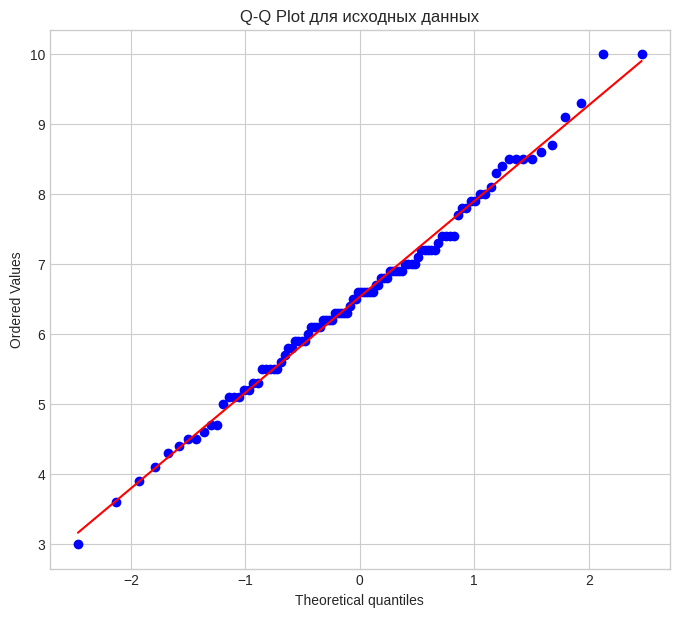

In [8]:
def chi_square_normality_test(data, bins=10):
    n = len(data)
    mean = data.mean()
    std = data.std()
    
    observed_freq, bin_edges = np.histogram(data, bins=bins)
    
    cdf_values = stats.norm.cdf(bin_edges, loc=mean, scale=std)
    expected_freq = n * np.diff(cdf_values)
    
    i = 0
    while i < len(expected_freq):
        if expected_freq[i] < 5:
            if i > 0:
                expected_freq[i-1] += expected_freq[i]
                observed_freq[i-1] += observed_freq[i]
                expected_freq = np.delete(expected_freq, i)
                observed_freq = np.delete(observed_freq, i)
                i -= 1
            elif i < len(expected_freq) - 1:
                expected_freq[i+1] += expected_freq[i]
                observed_freq[i+1] += observed_freq[i]
                expected_freq = np.delete(expected_freq, i)
                observed_freq = np.delete(observed_freq, i)
        i += 1
        
    chi2_stat = np.sum((observed_freq - expected_freq)**2 / expected_freq)
    dof = len(expected_freq) - 1 - 2
    p_value = 1 - stats.chi2.cdf(chi2_stat, df=dof)
    
    return chi2_stat, p_value, dof

chi2, p_val, dof = chi_square_normality_test(data_series)
print("\n1. Критерий Хи-квадрат (ручная реализация):")
print(f"   - Статистика χ²: {chi2:.4f}")
print(f"   - Степени свободы: {dof}")
print(f"   - p-value: {p_val:.4f}")

alpha = 0.05

print("\n2. Критерий асимметрии и эксцесса:")
print(f"   - Асимметрия: {skewness_val:.4f} (норма: ~0)")
print(f"   - Эксцесс: {kurtosis_val:.4f} (норма: ~0)")
if abs(skewness_val) < 1 and abs(kurtosis_val) < 1:
    print("   - Вывод: Значения асимметрии и эксцесса находятся в пределах, характерных для нормального распределения.")
else:
    print("   - Вывод: Значения асимметрии и/или эксцесса значительно отклоняются от нуля, что может указывать на ненормальность.")

fig, ax = plt.subplots(figsize=(8, 7))
stats.probplot(data_series, dist="norm", plot=ax)
ax.set_title('Q-Q Plot для исходных данных')
plt.show()

Вывод: p-value <= 0.05, гипотеза о нормальности отвергается.

Значения асимметрии и эксцесса находятся в пределах, характерных для нормального распределения.

# 3



Границы для выбросов: [3.35, 9.55]
Размер исходных данных: 100
Размер данных после удаления выбросов: 97
Удалено 3 точек.

--- Статистические характеристики для ОБРАБОТАННЫХ данных ---
Среднее: 6.4969
Дисперсия: 1.5041
Асимметрия: -0.0219
Эксцесс: -0.3185


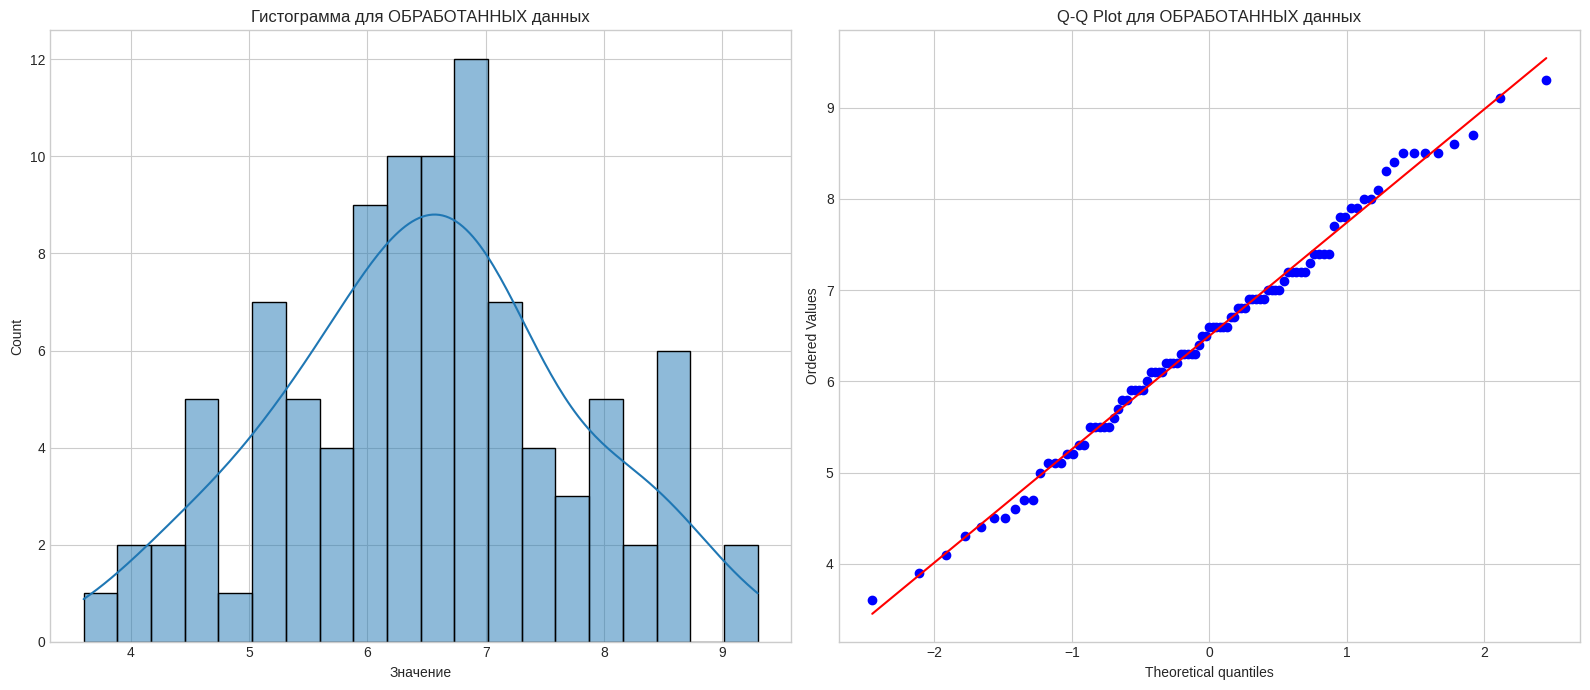


--- Проверка на нормальность для ОБРАБОТАННЫХ данных ---

1. Критерий Хи-квадрат:
   - Статистика χ²: 6.8822, p-value: 0.2296


In [9]:
Q1 = quantiles[0.25]
Q3 = quantiles[0.75]
lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr

data_processed = data_series[(data_series >= lower_bound) & (data_series <= upper_bound)]

print(f"\nГраницы для выбросов: [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"Размер исходных данных: {len(data_series)}")
print(f"Размер данных после удаления выбросов: {len(data_processed)}")
print(f"Удалено {len(data_series) - len(data_processed)} точек.")

print("\n--- Статистические характеристики для ОБРАБОТАННЫХ данных ---")
mean_proc = data_processed.mean()
var_proc = data_processed.var()
mode_proc = data_processed.mode()[0]
median_proc = data_processed.median()
quantiles_proc = data_processed.quantile([0.25, 0.5, 0.75])
kurtosis_proc = data_processed.kurtosis()
skewness_proc = data_processed.skew()
iqr_proc = quantiles_proc[0.75] - quantiles_proc[0.25]

print(f"Среднее: {mean_proc:.4f}")
print(f"Дисперсия: {var_proc:.4f}")
print(f"Асимметрия: {skewness_proc:.4f}")
print(f"Эксцесс: {kurtosis_proc:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
sns.histplot(data_processed, kde=True, ax=axes[0], bins=20)
axes[0].set_title(f'Гистограмма для ОБРАБОТАННЫХ данных')
axes[0].set_xlabel('Значение')
stats.probplot(data_processed, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot для ОБРАБОТАННЫХ данных')
plt.tight_layout()
plt.show()

print("\n--- Проверка на нормальность для ОБРАБОТАННЫХ данных ---")
chi2_proc, p_val_proc, dof_proc = chi_square_normality_test(data_processed)
print("\n1. Критерий Хи-квадрат:")
print(f"   - Статистика χ²: {chi2_proc:.4f}, p-value: {p_val_proc:.4f}")

# 4

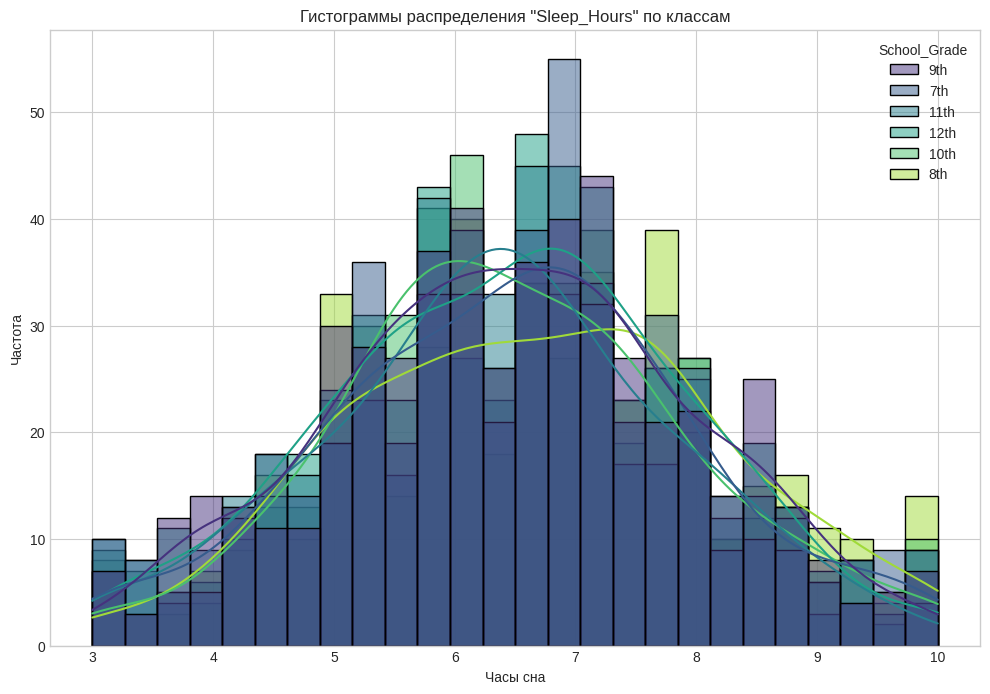


Среднее и дисперсия по группам (School_Grade):
                  mean       var
School_Grade                    
10th          6.488296  2.102064
11th          6.367432  2.113079
12th          6.459735  2.201804
7th           6.483702  2.287617
8th           6.675311  2.406853
9th           6.468441  2.196945


In [10]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x=column_to_analyze, hue='School_Grade', kde=True, palette='viridis', multiple='layer')
plt.title('Гистограммы распределения "Sleep_Hours" по классам')
plt.xlabel('Часы сна')
plt.ylabel('Частота')
plt.show()

grouped_stats = df.groupby('School_Grade')[column_to_analyze].agg(['mean', 'var'])
print("\nСреднее и дисперсия по группам (School_Grade):")
print(grouped_stats)